In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ase #package called Atomic Simulation Environment which allows us to construct crystals easily
from ase.spacegroup import crystal
from ase.visualize import view 
from ase.visualize.plot import plot_atoms
from tqdm import tqdm

In [ ]:
'''

This script is designed to generate a large scale crystal meant to import into a LAMMPS script using the ASE package. 
The inputs involve the lengths of the different bonds for the crystal, the spacegroup number, the symbols associated with one
unit cell, and defining some basis particles. 

@author: kmream
'''

# Configure the unit-cell atom as practice.

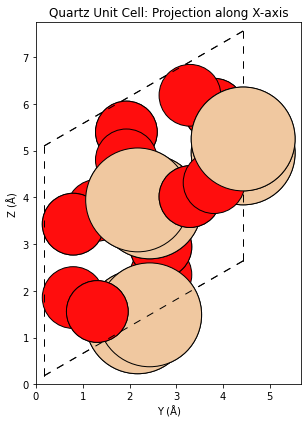

In [47]:
a, c = 4.9137, 5.4047  #units in angstroms

crystal_cell = crystal(
    symbols='Si2O4',
    basis=[
        (0.4697, 0.0, 0.0),     # Si
        (0.5303, 0.0, 0.6667),  # Si
        (0.4133, 0.2673, 0.7854),  # O
        (0.5867, -0.2673, 0.4520),
        (0.7327, 0.1460, 0.1199),
        (0.2673, -0.1460, 0.7854)
    ],
    spacegroup=152,  # P3121 for alpha-quartz
    cellpar=[4.9137, 4.9137, 5.4047, 90, 90, 120],
)

#view(crystal_cell)
fig, ax = plt.subplots(figsize=(8, 6))

# 2D projection — you can use 'x', 'y', 'z' for different views
plot_atoms(crystal_cell, ax, rotation='90z', show_unit_cell=2)

ax.set_xlabel("Y (Å)")
ax.set_ylabel("Z (Å)")
plt.title("Quartz Unit Cell: Projection along X-axis")
plt.tight_layout()
plt.show()

# Scale up the unit crystal to the desired size and write it to an output file.

In [49]:
crystal_unit = crystal(
    symbols=['Si', 'Si', 'O', 'O', 'O', 'O'],
    basis=[
        (0.4697, 0.0, 0.0),     # Si
        (0.5303, 0.0, 0.6667),  # Si
        (0.4133, 0.2673, 0.7854),  # O
        (0.5867, -0.2673, 0.4520),
        (0.7327, 0.1460, 0.1199),
        (0.2673, -0.1460, 0.7854)
    ],
    spacegroup=152,  # P3_121
    cellpar=[4.9137, 4.9137, 5.4047, 90, 90, 120],
)

# Scale up the unit cell (e.g., 4×4×4 supercell)
crystal_supercell = crystal_unit.repeat((50, 50, 50))
view(crystal_supercell)

# Save structure to file (e.g., .xyz or .lammps or .cif)
crystal_supercell.write('quartz_supercell.lmp', format='lammps-data')
with open('quartz_supercell.lmp', 'w') as f:
    f.write("ID Type x y z\n")
    for i, atom in enumerate(crystal_supercell, start=1):
        atom_type = atom.number  # or use a mapping from symbol if needed
        x, y, z = atom.position
        f.write(f"{i} {atom_type} {x:.6f} {y:.6f} {z:.6f}\n")

KeyboardInterrupt: 

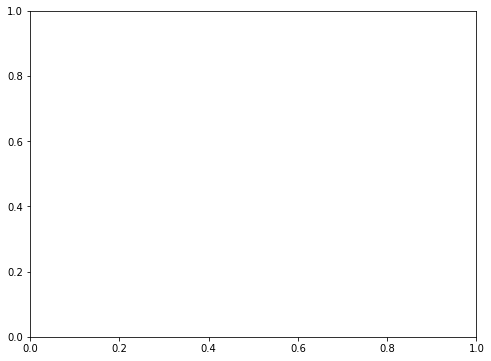

In [50]:
fig, ax = plt.subplots(figsize=(8, 6))

# 2D projection — you can use 'x', 'y', 'z' for different views
plot_atoms(crystal_supercell, ax, rotation='90z', show_unit_cell=2)

ax.set_xlabel("Y (Å)")
ax.set_ylabel("Z (Å)")
plt.title("Quartz Unit Cell: Projection along X-axis")
plt.tight_layout()
plt.show()